# Exploration 16 Îã§ÏùåÏóê Î≥º ÏòÅÌôî ÏòàÏ∏°ÌïòÍ∏∞

## : Session-Based Recommendation

In [ ]:
! pip install -r /requirements.txt

Processing /home/conda/feedstock_root/build_artifacts/aiohttp_1637087032947/work (from -r /requirements.txt (line 2))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/conda/feedstock_root/build_artifacts/aiohttp_1637087032947/work'



In [ ]:
import pandas
import tensorflow

print(pandas.__version__)
print(tensorflow.__version__)

1.5.3
2.15.0


In [ ]:
import datetime as dt
from pathlib import Path
import os
import time
from datetime import datetime
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/''/ratings.dat')
train_path = '/ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # dataÎ•º idÏôÄ ÏãúÍ∞Ñ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìï¥Ï§çÎãàÎã§.
data

UserId  ItemId  Rating       Time
31            1    3186       4  978300019
22            1    1270       5  978300055
27            1    1721       4  978300055
37            1    1022       5  978300055
24            1    2340       3  978300103
...         ...     ...     ...        ...
1000019    6040    2917       4  997454429
999988     6040    1921       4  997454464
1000172    6040    1784       3  997454464
1000167    6040     161       3  997454486
1000042    6040    1221       4  998315055

[1000209 rows x 4 columns]

* Ïó¨Í∏∞ÏÑú Ïù¥Ï†Ñ Ïã§Ïäµ ÎÇ¥Ïó≠Í≥º Í∞ÄÏû• ÌÅ¨Í≤å Îã§Î•∏ Î∂ÄÎ∂ÑÏùÄ Î∞îÎ°ú SessionID ÎåÄÏã† UserID Ìï≠Î™©Ïù¥ Îì§Ïñ¥Í∞îÎã§Îäî Ï†êÏûÖÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Î™ÖÌôïÌïú 1Ìöå ÏÑ∏ÏÖòÏùò SessionIDÎ•º Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ÎûòÏÑú Ïù¥Î≤àÏóêÎäî UserIDÍ∞Ä SessionID Ïó≠Ìï†ÏùÑ Ìï¥Ïïº Ìï©ÎãàÎã§.

* Rating Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Ïù¥Ï†Ñ Ïã§Ïäµ ÎÇ¥Ïó≠ÏóêÏÑúÎäî Ïù¥Îü∞ Ìï≠Î™©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú, Î¨¥ÏãúÌïòÍ≥† Ï†úÏô∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå, ÏßÅÏ†ÑÏóê Î¥§Îçò ÏòÅÌôîÍ∞Ä ÎßòÏóê Îì§ÏóàÎäîÏßÄÍ∞Ä ÎπÑÏä∑Ìïú ÏòÅÌôîÎ•º Îçî Í≥†Î•¥Í≤å ÌïòÎäî Í≤ÉÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏûàÏùÑ ÏàòÎèÑ ÏûàÏäµÎãàÎã§. ÏïÑÏö∏Îü¨, RatingÏù¥ ÎÇÆÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄÎèÑ Í≥†ÎØºÌï¥Ïïº Ìï©ÎãàÎã§.

* Time Ìï≠Î™©ÏóêÎäî UTC time Í∞Ä Ìè¨Ìï®ÎêòÏñ¥, 1970ÎÖÑ 1Ïõî 1ÏùºÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÎêú Ï¥à Îã®ÏúÑ ÏãúÍ∞ÑÏù¥ Í∏∞Ïû¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

# ÏÑ∏ÏÖòÏ†ïÏùò ÏãúÎèÑ 1 : 'UserId'Î•º Í∏∞Ï§ÄÏúºÎ°ú Í∞ÅÍ∞ÅÏùò Ïú†Ï†ÄÎ•º ÌïòÎÇòÏùò ÏÑ∏ÏÖòÏúºÎ°ú Ï†ïÏùò

## Step 1. Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨
ÏúÑÏôÄ Í∞ôÏù¥ Í∞ÑÎã®Ìûà Íµ¨ÏÑ±Ìï¥ Î≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÍººÍººÌûà ÏÇ¥Ìé¥Î≥¥Î©¥ÏÑú Ìï≠Î™©Î≥Ñ Í∏∞Î≥∏ Î∂ÑÏÑù, session length, session time, cleaning Îì±Ïùò ÏûëÏóÖÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

ÌäπÌûà, Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî SessionÏù¥ ÏïÑÎãå UserID Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÉùÏÑ±ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú, Ïù¥Î•º Session Îã®ÏúÑÎ°ú Ïñ¥ÎñªÍ≤å Ìï¥ÏÑùÌï†ÏßÄÏóê Ï£ºÏùòÌï©ÎãàÎã§.

In [ ]:
# Ïú†Ï†Ä ÏàòÏôÄ ÏïÑÏù¥ÌÖú Ïàò ÌôïÏù∏
data['UserId'].nunique(), data['ItemId'].nunique()

(6040, 3706)

In [ ]:
# Ìïú user idÎãπ Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Í∞ñÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏
session_length = data.groupby('UserId').size()
session_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [ ]:
# ÏÑ∏ÏÖò Í∏∏Ïù¥ ÌôïÏù∏
session_length.median(), session_length.mean()

(96.0, 165.5975165562914)

In [ ]:
session_length.min(), session_length.max()

(20, 2314)

In [ ]:
session_length.quantile(0.999)

1343.181000000005

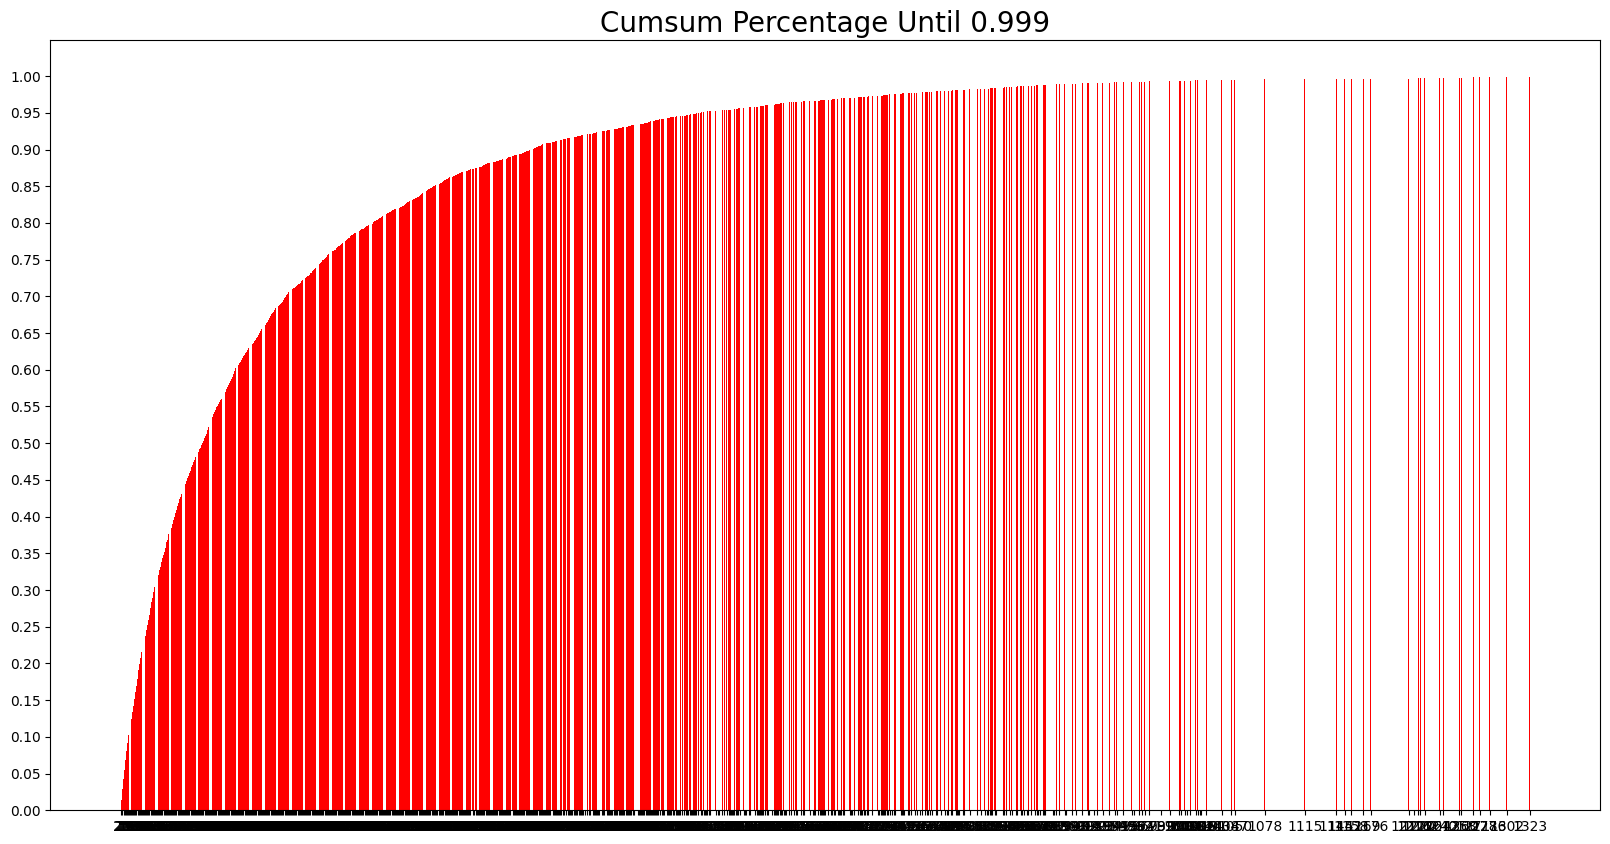

In [ ]:
# ÏÑ∏ÏÖò Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî (Ïù¥ÏÉÅÏπò ÌôïÏù∏)
# ÏÑ∏ÏÖò Í∏∏Ïù¥ Í∏∞Ï§Ä ÌïòÏúÑ 99.9%ÍπåÏßÄÏùò Î∂ÑÌè¨ ÎàÑÏ†ÅÌï©ÏùÑ ÏãúÍ∞ÅÌôî
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_999.index, height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

In [ ]:
# ÏãúÍ∞Ñ Í¥ÄÎ†® Ï†ïÎ≥¥ ÌôïÏù∏
oldest, latest = data['Time'].min(), data['Time'].max()
oldest, latest

(956703932, 1046454590)

In [ ]:
# timestampÎ•º time_struct ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
import time

tm_old = time.gmtime(oldest)
print(tm_old)

tm_latest = time.gmtime(latest)
print(tm_latest)

time.struct_time(tm_year=2000, tm_mon=4, tm_mday=25, tm_hour=23, tm_min=5, tm_sec=32, tm_wday=1, tm_yday=116, tm_isdst=0)
time.struct_time(tm_year=2003, tm_mon=2, tm_mday=28, tm_hour=17, tm_min=49, tm_sec=50, tm_wday=4, tm_yday=59, tm_isdst=0)


### 2000ÎÖÑ 4Ïõî 25ÏùºÎ∂ÄÌÑ∞ 2003ÎÖÑ 2Ïõî 28ÏùºÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùå

**session(user_id)Î≥ÑÎ°ú Îã§ÏùåÏóê Î≥º ÏòÅÌôîÎ•º ÏòàÏ∏°**

Ï¶â, ÏòÅÌôîÎ•º Ï∂îÏ≤ú(ÏòàÏ∏°)ÌïòÎäî ÏãúÏä§ÌÖúÏùÄ ÏÇ¨Ïö©ÏûêÏùò ÌèâÍ∞Ä(Rating)Í∞Ä Ï§ëÏöî

ÌèâÍ∞Ä(Rating) Î∂ÑÌè¨Î•º ÌôïÏù∏

<Axes: xlabel='Rating', ylabel='Density'>

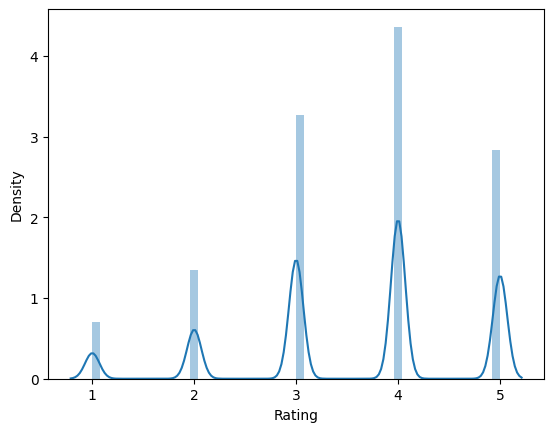

In [ ]:
import seaborn as sns
sns.distplot(data['Rating'])

**ÌèâÏ†êÏù¥ ÎÇÆÏùÄ ÏòÅÌôîÎäî Ï∂îÏ≤úÏù¥ ÎêòÏñ¥ÎèÑ Ï¢ãÏùÄ Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏù¥ ÏïÑÎãàÎùºÍ≥† ÏÉùÍ∞ÅÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÌèâÏ†ê 1,2Ïóê Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî ÏÇ≠Ï†ú**

In [ ]:
data = data[data['Rating']>=3]
len(data)

836478

In [ ]:
# short_sessionÏùÑ Ï†úÍ±∞Ìïú Îã§Ïùå unpopular itemÏùÑ Ï†úÍ±∞ÌïòÎ©¥ Îã§Ïãú Í∏∏Ïù¥Í∞Ä 1Ïù∏ sessionÏù¥ ÏÉùÍ∏∏ Ïàò ÏûàÏäµÎãàÎã§.
# Ïù¥Î•º ÏúÑÌï¥ Î∞òÎ≥µÎ¨∏ÏùÑ ÌÜµÌï¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†úÍ±∞ Ìï©ÎãàÎã§.
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('UserId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['UserId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [ ]:
data = cleanse_recursive(data, shortest=2, least_click=5)
data

UserId  ItemId  Rating       Time
31            1    3186       4  978300019
22            1    1270       5  978300055
27            1    1721       4  978300055
37            1    1022       5  978300055
24            1    2340       3  978300103
...         ...     ...     ...        ...
1000019    6040    2917       4  997454429
999988     6040    1921       4  997454464
1000172    6040    1784       3  997454464
1000167    6040     161       3  997454486
1000042    6040    1221       4  998315055

[835789 rows x 4 columns]

## step 2. ÎØ∏Îãà Î∞∞ÏπòÏùò Íµ¨ÏÑ±
Ïã§Ïäµ ÏΩîÎìú ÎÇ¥Ïó≠ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎØ∏Îãà Î∞∞ÏπòÎ•º Íµ¨ÏÑ±Ìï¥ Î¥ÖÏãúÎã§.

Session-Parallel Mini-BatchÏùò Í∞úÎÖêÏóê Îî∞Îùº, ÌïôÏäµ ÏÜçÎèÑÏùò Ï†ÄÌïòÍ∞Ä ÏµúÏÜåÌôîÎê† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÏÑ±Ìï©ÎãàÎã§.


Îã®, ÏúÑ Step 1ÏóêÏÑú Session Îã®ÏúÑÎ•º Ïñ¥ÎñªÍ≤å Ï†ïÏùòÌñàÎäêÎÉêÏóê Îî∞ÎùºÏÑú Session-Parallel Mini-BatchÏù¥ Íµ≥Ïù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

In [ ]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('Time')['Time'].max()


    # n_daysÎ•º timedelta Í∞ùÏ≤¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    n_days_timedelta = dt.timedelta(days=n_days)

    # Í∞Å ÏÑ∏ÏÖòÏùò ÏãúÍ∞Ñ Í∞ÑÍ≤©ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    time_intervals = session_last_time.apply(lambda x: final_time - x)

    # ÏãúÍ∞Ñ Í∞ÑÍ≤©Ïù¥ n_daysÎ≥¥Îã§ ÏûëÏùÄ ÏÑ∏ÏÖòÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
    session_in_train = time_intervals[time_intervals < n_days_timedelta].index

    # ÏãúÍ∞Ñ Í∞ÑÍ≤©Ïù¥ n_days Ïù¥ÏÉÅÏù∏ ÏÑ∏ÏÖòÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
    session_in_test = time_intervals[time_intervals >= n_days_timedelta].index

    before_date = data[data['Time'].isin(session_in_train)]
    after_date = data[data['Time'].isin(session_in_test)]
    after_date = after_date[after_date['UserId'].isin(before_date['ItemId'])]
    return before_date, after_date


In [ ]:
# 'Time' Ïó¥ÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # ÏòàÏãú: Ï¥à Îã®ÏúÑÎ°ú Ï†ÄÏû•Îêú Í≤ΩÏö∞

# split_by_date Ìï®Ïàò Ìò∏Ï∂ú
tr, test = split_by_date(data, n_days=90)
tr, val = split_by_date(tr, n_days=90)

In [ ]:
# dataÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["UserId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [ ]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 828507
	 Sessions: 6037
	 Items: 3307
	 First Time : 2000-04-25 23:05:32
	 Last Time : 2002-09-01 04:20:59

* valid Set Stats Info
	 Events: 3537
	 Sessions: 228
	 Items: 1540
	 First Time : 2002-09-01 19:41:39
	 Last Time : 2002-11-30 13:47:32

* test Set Stats Info
	 Events: 3745
	 Sessions: 230
	 Items: 1558
	 First Time : 2002-11-30 20:24:52
	 Last Time : 2003-02-28 17:49:50



In [ ]:
# train setÏóê ÏóÜÎäî ÏïÑÏù¥ÌÖúÏù¥ val, testÍ∏∞Í∞ÑÏóê ÏÉùÍ∏∏ Ïàò ÏûàÏúºÎØÄÎ°ú train dataÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïù∏Îç±Ïã±Ìï©ÎãàÎã§.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idxÏóê ÏóÜÎäî ÏïÑÏù¥ÌÖúÏùÄ Î™®Î•¥Îäî Í∞í(-1) Ï≤òÎ¶¨ Ìï¥Ï§çÎãàÎã§.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [ ]:
save_path = Path('/processed')
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

## Step 3. Î™®Îç∏ Íµ¨ÏÑ±


In [ ]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['UserId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['UserId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('UserId').size().cumsum()
        return offsets

In [ ]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

UserId  ItemId  Rating                Time  item_idx
31       1    3186       4 2000-12-31 22:00:19         0
22       1    1270       5 2000-12-31 22:00:55         1
27       1    1721       4 2000-12-31 22:00:55         2
37       1    1022       5 2000-12-31 22:00:55         3
24       1    2340       3 2000-12-31 22:01:43         4
36       1    1836       5 2000-12-31 22:02:52         5
3        1    3408       4 2000-12-31 22:04:35         6
7        1    2804       5 2000-12-31 22:11:59         7
47       1    1207       4 2000-12-31 22:11:59         8
0        1    1193       5 2000-12-31 22:12:40         9

In [ ]:
tr_dataset.click_offsets

array([     0,     53,    169, ..., 828112, 828231, 828507], dtype=int32)

In [ ]:
tr_dataset.session_idx

array([   0,    1,    2, ..., 6034, 6035, 6036])

In [ ]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=32):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize Î©îÏÜåÎìúÏóêÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """
        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # Ï≤´ Î∞∞ÏπòÏóê ÏÇ¨Ïö©Ìï† ÏÑ∏ÏÖò IndexÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        last_session = self.batch_size - 1    # ÎßàÏßÄÎßâÏúºÎ°ú Îã§Î£®Í≥† ÏûàÎäî ÏÑ∏ÏÖò IndexÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data ÏÉÅÏóêÏÑú sessionÏù¥ ÏãúÏûëÎêú ÏúÑÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # sessionÏù¥ ÎÅùÎÇú ÏúÑÏπò Î∞îÎ°ú Îã§Ïùå ÏúÑÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        mask = np.array([])   # sessionÏùò Î™®Îì† ÏïÑÏù¥ÌÖúÏùÑ Îã§ ÎèåÏùÄ Í≤ΩÏö∞ maskÏóê Ï∂îÍ∞ÄÌï¥Ï§Ñ Í≤ÉÏûÖÎãàÎã§.
        finished = False         # dataÎ•º Ï†ÑÎ∂Ä ÎèåÏïòÎäîÏßÄ Í∏∞Î°ùÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàòÏûÖÎãàÎã§.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):
        # Îã§Ïùå Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉÅÌÉúÎ•º updateÌï©ÎãàÎã§.
        start += min_len   # __iter__ÏóêÏÑú min_len ÎßåÌÅº forÎ¨∏ÏùÑ ÎèåÏïòÏúºÎØÄÎ°ú startÎ•º min_len ÎßåÌÅº ÎçîÌï¥Ï§çÎãàÎã§.
        mask = np.arange(self.batch_size)[(end - start) == 1]
        # endÎäî Îã§Ïùå ÏÑ∏ÏÖòÏù¥ ÏãúÏûëÎêòÎäî ÏúÑÏπòÏù∏Îç∞ startÏôÄ Ìïú Ïπ∏ Ï∞®Ïù¥ÎÇúÎã§Îäî Í≤ÉÏùÄ sessionÏù¥ ÎÅùÎÇ¨Îã§Îäî ÎúªÏûÖÎãàÎã§. maskÏóê Í∏∞Î°ùÌï¥Ï§çÎãàÎã§.

        for i, idx in enumerate(mask, start=1):  # maskÏóê Ï∂îÍ∞ÄÎêú ÏÑ∏ÏÖò Í∞úÏàòÎßåÌÅº ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏùÑ ÎèåÍ≤ÉÏûÖÎãàÎã§.
            new_session = last_session + i
            if new_session > self.dataset.session_idx[-1]:  # ÎßåÏïΩ ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏù¥ ÎßàÏßÄÎßâ ÏÑ∏ÏÖò indexÎ≥¥Îã§ ÌÅ¨Îã§Î©¥ Î™®Îì† ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º Îèà Í≤ÉÏûÖÎãàÎã§.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # Ï¢ÖÎ£åÎêú ÏÑ∏ÏÖò ÎåÄÏã† ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏùò ÏãúÏûëÏ†êÏùÑ Í∏∞Î°ùÌï©ÎãàÎã§.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # ÎßàÏßÄÎßâ ÏÑ∏ÏÖòÏùò ÏúÑÏπòÎ•º Í∏∞Î°ùÌï¥Îë°ÎãàÎã§.
        return start, end, mask, last_session, finished

In [ ]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

UserId  ItemId  Rating                Time  item_idx
31       1    3186       4 2000-12-31 22:00:19         0
22       1    1270       5 2000-12-31 22:00:55         1
27       1    1721       4 2000-12-31 22:00:55         2
37       1    1022       5 2000-12-31 22:00:55         3
24       1    2340       3 2000-12-31 22:01:43         4
36       1    1836       5 2000-12-31 22:02:52         5
3        1    3408       4 2000-12-31 22:04:35         6
7        1    2804       5 2000-12-31 22:11:59         7
47       1    1207       4 2000-12-31 22:11:59         8
0        1    1193       5 2000-12-31 22:12:40         9
21       1     720       3 2000-12-31 22:12:40        10
44       1     260       4 2000-12-31 22:12:40        11
9        1     919       4 2000-12-31 22:22:48        12
51       1     608       4 2000-12-31 22:23:18        13
43       1    2692       4 2000-12-31 22:26:10        14

In [ ]:
iter_ex = iter(tr_data_loader)

In [ ]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 0 53 64 54]
Label Item Idx are :       [ 1 54 62 24]
Previous Masked Input Idx are []


In [ ]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['UserId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=128, hsz=50, drop_rate=0.1, lr=0.001, epochs=3, k=5)

In [ ]:
model = create_model(args)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(128, 1, 3307)]          0         
                                                                 
 GRU (GRU)                   [(128, 50),               503850    
                              (128, 50)]                         
                                                                 
 dropout (Dropout)           (128, 50)                 0         
                                                                 
 dense (Dense)               (128, 3307)               168657    
                                                                 
Total params: 672507 (2.57 MB)
Trainable params: 672507 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 4. Î™®Îç∏ ÌïôÏäµ


In [ ]:
tr['UserId'].nunique()

6037

In [ ]:
# train ÏÖãÏúºÎ°ú ÌïôÏäµÌïòÎ©¥ÏÑú valid ÏÖãÏúºÎ°ú Í≤ÄÏ¶ùÌï©ÎãàÎã§.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['UserId'].nunique()
        tr_loader = tqdm(train_loader, total= total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # Ï¢ÖÎ£åÎêú sessionÏùÄ hidden_stateÎ•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§. ÏïÑÎûò Î©îÏÑúÎìúÏóêÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid setÏóê ÎåÄÌï¥ Í≤ÄÏ¶ùÌï©ÎãàÎã§.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")

def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # modelÏóêÏÑú gru layerÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
    hidden_states = gru_layer.states[0].numpy()  # gru_layerÏùò parameterÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
    for elt in mask:  # maskÎêú Ïù∏Îç±Ïä§ Ï¶â, Ï¢ÖÎ£åÎêú ÏÑ∏ÏÖòÏùò Ïù∏Îç±Ïä§Î•º ÎèåÎ©¥ÏÑú
        hidden_states[elt, :] = 0  # parameterÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§.
    gru_layer.reset_states(states=hidden_states)

def get_metrics(data, model, args, k: int):  # validÏÖãÍ≥º testÏÖãÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.
                                             # trainÍ≥º Í±∞Ïùò Í∞ôÏßÄÎßå mrr, recallÏùÑ Íµ¨ÌïòÎäî ÎùºÏù∏Ïù¥ ÏûàÏäµÎãàÎã§.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['UserId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax Í∞íÏù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï©ÎãàÎã§.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [ ]:
train_model(model, args)


Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


Evaluation:   8%|‚ñä         | 2/25 [00:01<00:16,  1.36it/s]

1/1 [==============================] - 0s 36ms/step


Evaluation:  16%|‚ñà‚ñå        | 4/25 [00:02<00:14,  1.44it/s]


	 - Recall@5 epoch 1: 0.021484
	 - MRR@5    epoch 1: 0.013639



Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Evaluation:   8%|‚ñä         | 2/25 [00:01<00:12,  1.78it/s]

1/1 [==============================] - 0s 26ms/step


Evaluation:  16%|‚ñà‚ñå        | 4/25 [00:02<00:11,  1.77it/s]


	 - Recall@5 epoch 2: 0.021484
	 - MRR@5    epoch 2: 0.013151



Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Evaluation:   8%|‚ñä         | 2/25 [00:01<00:15,  1.53it/s]

1/1 [==============================] - 0s 43ms/step


Evaluation:  16%|‚ñà‚ñå        | 4/25 [00:02<00:14,  1.41it/s]

	 - Recall@5 epoch 3: 0.027344
	 - MRR@5    epoch 3: 0.015918



**epochÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ÏÑú accuracyÎäî Ï¶ùÍ∞ÄÌïòÍ≥†, lossÎäî Ï§ÑÏñ¥ÎìúÎäîÍ±∏ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.**

**ÎòêÌïú Recall Í∞íÍ≥º MRR Í∞íÎèÑ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ ÌïôÏäµÏù¥ Ïûò Ïù¥Î£®Ïñ¥ÏßÑÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.**

## Step 5. Î™®Îç∏ ÌÖåÏä§Ìä∏
ÎØ∏Î¶¨ Íµ¨ÏÑ±Ìïú ÌÖåÏä§Ìä∏ÏÖãÏùÑ Î∞îÌÉïÏúºÎ°ú Recall, MRR ÏùÑ ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.

In [ ]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\n - Recall@{args.k}: {test_recall:3f}")
    print(f"\n - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:   0%|          | 0/27 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Evaluation:   4%|‚ñé         | 1/27 [00:02<01:07,  2.60s/it]

1/1 [==============================] - 0s 127ms/step


Evaluation:   7%|‚ñã         | 2/27 [00:05<01:14,  2.97s/it]

1/1 [==============================] - 0s 95ms/step


Evaluation:  11%|‚ñà         | 3/27 [00:09<01:13,  3.07s/it]

1/1 [==============================] - 0s 23ms/step


Evaluation:  15%|‚ñà‚ñç        | 4/27 [00:10<00:59,  2.58s/it]


 - Recall@5: 0.173828

 - MRR@5: 0.053116



**Recall : 0.17**

**MRR : 0.053**

# Î∂ÑÏÑù Î∞è Î¨∏Ï†úÌôïÏù∏
### 1 : 3ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ 'UserId'Î•º ÏÑ∏ÏÖòÏùò Í∏∞Ï§ÄÏúºÎ°ú ÏÑ§Ï†ïÌï®.
* Recall : 0.17
* MRR : 0.053

### Î¨∏Ï†ú : Ïú†Ï†ÄÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏ÏÖòÏùÑ ÎÇòÎàÑÍ≤å ÎêòÎ©¥ 'Îã§Ïùå ÌÅ¥Î¶≠ÏùÑ ÏòàÏ∏°ÌïòÎäî' ÏùòÎØ∏Î≥¥Îã§Îäî 'Ïú†Ï†ÄÎ≥Ñ ÏòÅÌôî ÏÑ†Ìò∏ÎèÑ'Î•º ÏòàÏ∏°ÌïòÎäî ÏùòÎØ∏Í∞Ä Îçî Ïª§Ïßê. 
### üí° Ìï¥Í≤∞ Ï†ÑÎûµ >> ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏ÏÖòÏùÑ Ï†ïÏùòÌïòÏó¨ Î™®Îç∏Ïóê Ï†ÅÏö© ÏãúÎèÑ

# ÏÑ∏ÏÖòÏ†ïÏùò ÏãúÎèÑ 2 : Ï†ëÏÜçÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ìïú Ïú†Ï†ÄÏùò ÌïòÎ£® ÎèôÏïàÏùò Ï†ëÏÜçÏùÑ ÌïòÎÇòÏùò ÏÑ∏ÏÖòÏúºÎ°ú Ï†ïÏùò

In [2]:
import pandas
import tensorflow

print(pandas.__version__)
print(tensorflow.__version__)

1.3.3
2.6.0


In [3]:
import datetime as dt
from pathlib import Path
import os
import time
from datetime import datetime
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # dataÎ•º idÏôÄ ÏãúÍ∞Ñ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìï¥Ï§çÎãàÎã§.
data

UserId  ItemId  Rating       Time
31            1    3186       4  978300019
22            1    1270       5  978300055
27            1    1721       4  978300055
37            1    1022       5  978300055
24            1    2340       3  978300103
...         ...     ...     ...        ...
1000019    6040    2917       4  997454429
999988     6040    1921       4  997454464
1000172    6040    1784       3  997454464
1000167    6040     161       3  997454486
1000042    6040    1221       4  998315055

[1000209 rows x 4 columns]

## Step 1. Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨

### session(user_id)Î≥ÑÎ°ú Îã§ÏùåÏóê Î≥º ÏòÅÌôîÎ•º ÏòàÏ∏° (Îã§Ïùå ÌÅ¥Î¶≠ ÏòàÏ∏°)

1. ÌèâÏ†êÏù¥ 3ÎØ∏ÎßåÏù∏ Îç∞Ïù¥ÌÑ∞Îäî Ï∂îÏ≤úÌïòÍ∏∞Ïóê Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùå >> Ï†úÍ±∞


2. 1ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© >> ‚ùóÔ∏èÎ≥ÄÍ≤Ω : Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÎÑàÎ¨¥ ÏûëÏïÑ 3ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞ Î™®Îëê ÏÇ¨Ïö©


3. user id Î≥ÑÎ°ú group ÌõÑ ÌïòÎ£®Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏ÏÖòÏùÑ ÎÇòÎàî


## ÌèâÏ†ê(Rating) ÌôïÏù∏

<AxesSubplot:xlabel='Rating', ylabel='Density'>

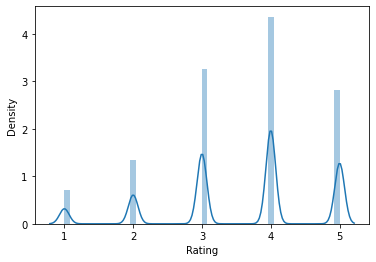

In [5]:
# ÌèâÍ∞Ä(Rating) Î∂ÑÌè¨Î•º ÌôïÏù∏
import seaborn as sns
sns.distplot(data['Rating'])

### Î∂ÑÏÑù : ÌèâÏ†êÏù¥ ÎÇÆÏùÄ ÏòÅÌôîÎäî Ï∂îÏ≤úÏù¥ ÎêòÏñ¥ÎèÑ Ï¢ãÏùÄ Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏù¥ ÏïÑÎãàÎùºÍ≥† ÏÉùÍ∞ÅÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÌèâÏ†ê 1,2Ïóê Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî ÏÇ≠Ï†ú

In [7]:
data = data[data['Rating']>3]
len(data)

575281

## ÏãúÍ∞Ñ Í¥ÄÎ†® Ï†ïÎ≥¥ ÌôïÏù∏

In [8]:
oldest, latest = data['Time'].min(), data['Time'].max()
oldest, latest

(956703932, 1046454590)

In [9]:
# timestampÎ•º time_struct ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
import time

tm_old = time.gmtime(oldest)
print(tm_old)

tm_latest = time.gmtime(latest)
print(tm_latest)

time.struct_time(tm_year=2000, tm_mon=4, tm_mday=25, tm_hour=23, tm_min=5, tm_sec=32, tm_wday=1, tm_yday=116, tm_isdst=0)
time.struct_time(tm_year=2003, tm_mon=2, tm_mday=28, tm_hour=17, tm_min=49, tm_sec=50, tm_wday=4, tm_yday=59, tm_isdst=0)


### Î∂ÑÏÑù : 2000ÎÖÑ 4Ïõî 25ÏùºÎ∂ÄÌÑ∞ 2003ÎÖÑ 2Ïõî 28ÏùºÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùå

In [ ]:
# ### 1ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©

# import datetime as dt
# import numpy as np

# # Unix ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑÎ•º datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
# latest_datetime = dt.datetime.utcfromtimestamp(latest)

# # ÏµúÏ¢Ö ÎÇ†ÏßúÎ°úÎ∂ÄÌÑ∞ 1ÎÖÑ(365Ïùº) Ïù¥Ï†Ñ ÎÇ†Ïßú Í≥ÑÏÇ∞
# month_ago = latest_datetime - dt.timedelta(days=365)

# # 1ÎÖÑ Ïù¥ÌõÑÏùò Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
# data = data[data['Time'] > month_ago]

# # Í≤∞Í≥º ÌôïÏù∏
# data

## ÏÑ∏ÏÖò Ï†ïÏùò ÌõÑ ÎÇòÎà†Ï£ºÍ∏∞

In [10]:
# Time Ïó¥ÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# UserIdÎ°ú Í∑∏Î£πÌôîÌïòÍ≥† Í∞ôÏùÄ ÎÇ†ÏßúÏóê Î∞úÏÉùÌïú Îç∞Ïù¥ÌÑ∞ÎÅºÎ¶¨ 1Í∞úÏùò ÏÑ∏ÏÖòÏúºÎ°ú Î¨∂Í∏∞
data['SessionId'] = data.groupby(['UserId', data['Time'].dt.date]).ngroup()

data[['UserId', 'Time', 'SessionId']]

UserId                Time  SessionId
31            1 2000-12-31 22:00:19          0
22            1 2000-12-31 22:00:55          0
27            1 2000-12-31 22:00:55          0
37            1 2000-12-31 22:00:55          0
36            1 2000-12-31 22:02:52          0
...         ...                 ...        ...
1000119    6040 2001-08-10 14:39:27      19617
999923     6040 2001-08-10 14:39:58      19617
1000019    6040 2001-08-10 14:40:29      19617
999988     6040 2001-08-10 14:41:04      19617
1000042    6040 2001-08-20 13:44:15      19618

[575281 rows x 3 columns]

In [11]:
# Îëê Í∞ú Ïù¥ÏÉÅÏùò SessionIdÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî UserId ÌôïÏù∏

# UserIdÎ°ú Í∑∏Î£πÌôîÌïòÍ≥† SessionIdÏùò Í≥†Ïú†Ìïú Í∞íÏùò Í∞úÏàò
session_counts = data.groupby('UserId')['SessionId'].nunique()

multiple_sessions = session_counts[session_counts >= 2]
print("Îëê Í∞ú Ïù¥ÏÉÅÏùò SessionIdÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî UserId:\n", multiple_sessions)

Îëê Í∞ú Ïù¥ÏÉÅÏùò SessionIdÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî UserId:
 UserId
1        2
10       5
11       3
15       2
19      13
        ..
6028     2
6037     2
6038     2
6039     2
6040    10
Name: SessionId, Length: 2445, dtype: int64


In [12]:
# ÌôïÏù∏Ïö© ÏòàÏãú Ï∂úÎ†•
data[data['UserId'] == 1]

UserId  ItemId  Rating                Time  SessionId
31       1    3186       4 2000-12-31 22:00:19          0
22       1    1270       5 2000-12-31 22:00:55          0
27       1    1721       4 2000-12-31 22:00:55          0
37       1    1022       5 2000-12-31 22:00:55          0
36       1    1836       5 2000-12-31 22:02:52          0
3        1    3408       4 2000-12-31 22:04:35          0
7        1    2804       5 2000-12-31 22:11:59          0
47       1    1207       4 2000-12-31 22:11:59          0
0        1    1193       5 2000-12-31 22:12:40          0
44       1     260       4 2000-12-31 22:12:40          0
9        1     919       4 2000-12-31 22:22:48          0
51       1     608       4 2000-12-31 22:23:18          0
43       1    2692       4 2000-12-31 22:26:10          0
41       1    1961       5 2000-12-31 22:26:30          0
48       1    2028       5 2000-12-31 22:26:59          0
18       1    3105       5 2000-12-31 22:28:33          0
11       1     938       4 2000-12-31 22:29:12          0
14       1    1035       5 2000-12-31 22:29:13          0
42       1    1962       4 2000-12-31 22:29:13          0
17       1    2018       4 2000-12-31 22:29:37          0
39       1     150       5 2000-12-31 22:29:37          0
45       1    1028       5 2000-12-31 22:29:37          0
26       1    1097       4 2000-12-31 22:32:33          0
6        1    1287       5 2000-12-31 22:33:59          0
19       1    2797       4 2000-12-31 22:33:59          0
38       1    2762       4 2000-12-31 22:34:51          0
52       1    1246       4 2000-12-31 22:34:51          0
13       1    2918       4 2000-12-31 22:35:24          0
49       1     531       4 2000-12-31 22:35:49          0
50       1    3114       4 2000-12-31 22:36:14          0
15       1    2791       4 2000-12-31 22:36:28          0
46       1    1029       5 2000-12-31 22:36:45          0
8        1     594       4 2000-12-31 22:37:48          0
12       1    2398       4 2000-12-31 22:38:01          0
28       1    1545       4 2001-01-06 23:35:39          1
23       1     527       5 2001-01-06 23:36:35          1
10       1     595       5 2001-01-06 23:37:48          1
33       1     588       4 2001-01-06 23:37:48          1
40       1       1       5 2001-01-06 23:37:48          1
4        1    2355       5 2001-01-06 23:38:11          1
30       1    2294       4 2001-01-06 23:38:11          1
35       1     783       4 2001-01-06 23:38:11          1
32       1    1566       4 2001-01-06 23:38:50          1
34       1    1907       4 2001-01-06 23:38:50          1
25       1      48       5 2001-01-06 23:39:11          1

## ÏÑ∏ÏÖò Í∏∏Ïù¥ ÌôïÏù∏

In [16]:
# ÏÑ∏ÏÖòÎãπ Î™áÍ∞úÏùò ÌÅ¥Î¶≠(ÏòÅÌôî)Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏
session_length = data.groupby('SessionId').size()

session_length.min(), session_length.max(), session_length.mean(), session_length.median()

(1, 741, 29.322646414190327, 7.0)

In [17]:
session_length.quantile(0.999)

470.43800000001283

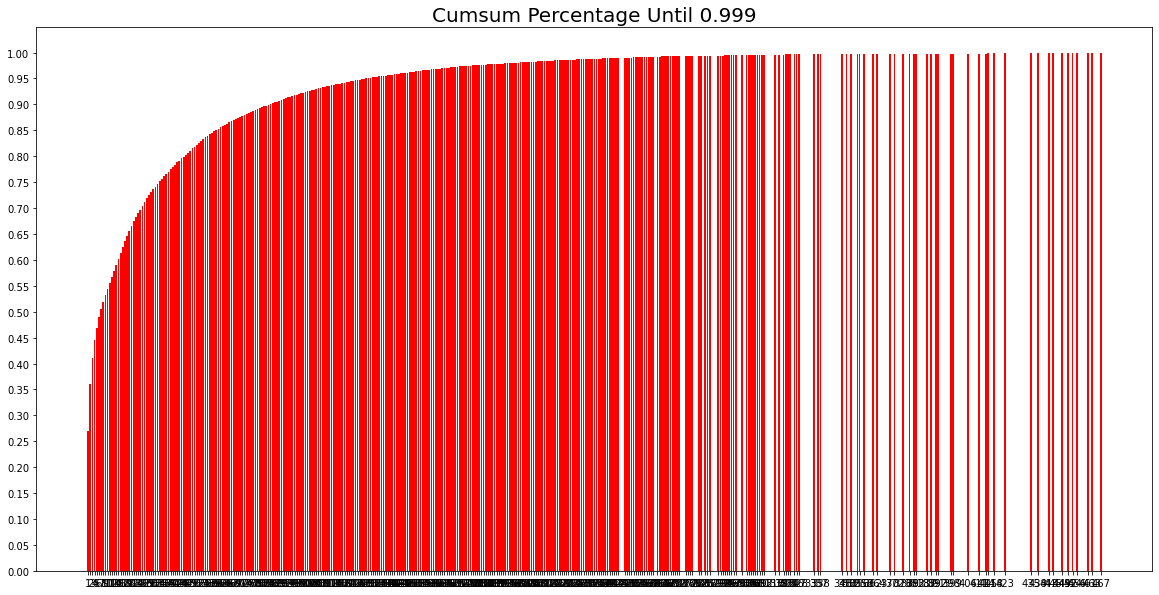

In [18]:
# ÏÑ∏ÏÖò Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî (Ïù¥ÏÉÅÏπò ÌôïÏù∏)
# ÏÑ∏ÏÖò Í∏∏Ïù¥ Í∏∞Ï§Ä ÌïòÏúÑ 99.9%ÍπåÏßÄÏùò Î∂ÑÌè¨ ÎàÑÏ†ÅÌï©ÏùÑ ÏãúÍ∞ÅÌôî
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_999.index, height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

### Î∂ÑÏÑù : ÏÑ∏ÏÖòÍ∏∏Ïù¥Í∞Ä 470 Ïù¥ÌïòÏùò Îç∞Ïù¥ÌÑ∞ÎßåÏúºÎ°úÎèÑ Ï∂©Î∂ÑÌûà 99%Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌï† Ïàò ÏûàÏúºÎØÄÎ°ú outlierÍ∞Ä Îê† Ïàò ÏûàÎäî session Í∏∏Ïù¥Í∞Ä 470 Îç∞Ïù¥ÌÑ∞Îäî Ï†úÍ±∞

In [19]:
# ÏÑ∏ÏÖò Í∏∏Ïù¥ ÌôïÏù∏
# ÏÑ∏ÏÖò Í∏∏Ïù¥Í∞Ä 470 Ïù¥ÌïòÏù∏ UserId ÏÑ†ÌÉù
valid_session_ids = session_length[session_length <= 470].index

# Ïú†Ìö®Ìïú UserIdÎ•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
data = data[data['SessionId'].isin(valid_session_ids)]
data

UserId  ItemId  Rating                Time  SessionId
31            1    3186       4 2000-12-31 22:00:19          0
22            1    1270       5 2000-12-31 22:00:55          0
27            1    1721       4 2000-12-31 22:00:55          0
37            1    1022       5 2000-12-31 22:00:55          0
36            1    1836       5 2000-12-31 22:02:52          0
...         ...     ...     ...                 ...        ...
1000119    6040    3671       4 2001-08-10 14:39:27      19617
999923     6040     232       5 2001-08-10 14:39:58      19617
1000019    6040    2917       4 2001-08-10 14:40:29      19617
999988     6040    1921       4 2001-08-10 14:41:04      19617
1000042    6040    1221       4 2001-08-20 13:44:15      19618

[564111 rows x 5 columns]

## Data Cleansing
Í∏∏Ïù¥Í∞Ä 1Ïù∏ ÏÑ∏ÏÖòÎèÑ ÏûàÏùå >> Ïö∞Î¶¨Ïùò Î™©Ï†ÅÏùÄ Ïú†Ï†ÄÍ∞Ä ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅ ÌÅ¥Î¶≠ÌñàÏùÑ Îïå Îã§Ïùå ÌÅ¥Î¶≠ÏùÑ ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥ÎØÄÎ°ú Í∏∏Ïù¥Í∞Ä 1Ïù∏ ÏÑ∏ÏÖòÏùÄ Ï†úÍ±∞

**ÎÖ∏ÎìúÏóêÏÑúÎäî ÎÑàÎ¨¥ Ï†ÅÍ≤å ÌÅ¥Î¶≠Îêú ÏïÑÏù¥ÌÖúÏùÄ Ïù¥ÏÉÅÌïú ÏïÑÏù¥ÌÖúÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏñ¥ Ï†úÍ±∞Ìï¥Ï§¨ÏßÄÎßå, Ïù¥ÎØ∏ ÌèâÏ†êÏù¥ ÎÇÆÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌñàÍ∏∞ÎïåÎ¨∏Ïóê Ïù¥ Í≥ºÏ†ïÏùÄ ÏÉùÎûµ**

In [34]:
# Í∏∏Ïù¥Í∞Ä 1Ïù∏ ÏÑ∏ÏÖòÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
shortest = 2
session_len = data.groupby('SessionId').size()
session_use = session_len[session_len < shortest].index
session_use

Int64Index([   22,    29,    31,    33,    34,    36,    54,    79,    90,
              121,
            ...
            19539, 19542, 19543, 19563, 19567, 19568, 19594, 19615, 19616,
            19618],
           dtype='int64', name='SessionId', length=5288)

In [38]:
# ÌïòÎÇòÏùò ÏòàÏãú(index = 22) ÌôïÏù∏
print(data[data['SessionId'] == 22])
data[data['UserId'] == 15][90:]

      UserId  ItemId  Rating                Time  SessionId
1520      15    3510       5 2001-01-01 15:03:13         22


UserId  ItemId  Rating                Time  SessionId
1545      15    1422       4 2000-12-30 21:41:03         21
1685      15    1597       4 2000-12-30 21:41:03         21
1569      15    3489       4 2000-12-30 21:43:11         21
1521      15    1196       4 2000-12-30 21:43:48         21
1560      15     260       4 2000-12-30 21:44:05         21
1656      15    1210       4 2000-12-30 21:44:23         21
1547      15    3461       4 2000-12-30 21:44:58         21
1693      15    2115       4 2000-12-30 21:45:20         21
1520      15    3510       5 2001-01-01 15:03:13         22

In [39]:
# short_sessionÏùÑ Ï†úÍ±∞Ìïú Îã§Ïùå unpopular itemÏùÑ Ï†úÍ±∞ÌïòÎ©¥ Îã§Ïãú Í∏∏Ïù¥Í∞Ä 1Ïù∏ sessionÏù¥ ÏÉùÍ∏∏ Ïàò ÏûàÏäµÎãàÎã§.
# Ïù¥Î•º ÏúÑÌï¥ Î∞òÎ≥µÎ¨∏ÏùÑ ÌÜµÌï¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†úÍ±∞ Ìï©ÎãàÎã§.
def cleanse_recursive(data: pd.DataFrame, shortest) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        #data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('UserId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['UserId'].isin(session_use)]
    return data


# def cleanse_unpopular_item(data: pd.DataFrame, least_click):
#     item_popular = data.groupby('ItemId').size()
#     item_use = item_popular[item_popular >= least_click].index
#     data = data[data['ItemId'].isin(item_use)]
#     return data

In [40]:
data = cleanse_recursive(data, shortest=2)
len(data)

564109

## step 2. ÎØ∏Îãà Î∞∞ÏπòÏùò Íµ¨ÏÑ±
Ïã§Ïäµ ÏΩîÎìú ÎÇ¥Ïó≠ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎØ∏Îãà Î∞∞ÏπòÎ•º Íµ¨ÏÑ±Ìï¥ Î¥ÖÏãúÎã§.

Session-Parallel Mini-BatchÏùò Í∞úÎÖêÏóê Îî∞Îùº, ÌïôÏäµ ÏÜçÎèÑÏùò Ï†ÄÌïòÍ∞Ä ÏµúÏÜåÌôîÎê† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÏÑ±Ìï©ÎãàÎã§.


Îã®, ÏúÑ Step 1ÏóêÏÑú Session Îã®ÏúÑÎ•º Ïñ¥ÎñªÍ≤å Ï†ïÏùòÌñàÎäêÎÉêÏóê Îî∞ÎùºÏÑú Session-Parallel Mini-BatchÏù¥ Íµ≥Ïù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

In [41]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('SessionId')['Time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index

    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [42]:
# 'Time' Ïó¥ÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # ÏòàÏãú: Ï¥à Îã®ÏúÑÎ°ú Ï†ÄÏû•Îêú Í≤ΩÏö∞

# split_by_date Ìï®Ïàò Ìò∏Ï∂ú
tr, test = split_by_date(data, n_days=90)
tr, val = split_by_date(tr, n_days=90)

In [43]:
# dataÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["UserId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [44]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 559309
	 Sessions: 6029
	 Items: 3514
	 First Time : 2000-04-25 23:05:32
	 Last Time : 2002-09-01 04:20:59

* valid Set Stats Info
	 Events: 2265
	 Sessions: 207
	 Items: 1106
	 First Time : 2002-09-01 04:16:16
	 Last Time : 2002-11-30 13:47:32

* test Set Stats Info
	 Events: 2533
	 Sessions: 207
	 Items: 1198
	 First Time : 2002-11-30 20:24:52
	 Last Time : 2003-02-28 17:49:50



In [45]:
# train setÏóê ÏóÜÎäî ÏïÑÏù¥ÌÖúÏù¥ val, testÍ∏∞Í∞ÑÏóê ÏÉùÍ∏∏ Ïàò ÏûàÏúºÎØÄÎ°ú train dataÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïù∏Îç±Ïã±Ìï©ÎãàÎã§.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idxÏóê ÏóÜÎäî ÏïÑÏù¥ÌÖúÏùÄ Î™®Î•¥Îäî Í∞í(-1) Ï≤òÎ¶¨ Ìï¥Ï§çÎãàÎã§.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [46]:
save_path = Path('/processed')
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

## Step 3. Î™®Îç∏ Íµ¨ÏÑ±


In [65]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['SessionId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

In [66]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

UserId  ItemId  Rating                Time  SessionId  item_idx
31       1    3186       4 2000-12-31 22:00:19          0         0
22       1    1270       5 2000-12-31 22:00:55          0         1
27       1    1721       4 2000-12-31 22:00:55          0         2
37       1    1022       5 2000-12-31 22:00:55          0         3
36       1    1836       5 2000-12-31 22:02:52          0         4
3        1    3408       4 2000-12-31 22:04:35          0         5
7        1    2804       5 2000-12-31 22:11:59          0         6
47       1    1207       4 2000-12-31 22:11:59          0         7
0        1    1193       5 2000-12-31 22:12:40          0         8
44       1     260       4 2000-12-31 22:12:40          0         9

In [68]:
tr_dataset.click_offsets

array([     0,     34,     45, ..., 559291, 559308, 559309], dtype=int32)

In [69]:
tr_dataset.session_idx

array([    0,     1,     2, ..., 18657, 18658, 18659])

In [70]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=32):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize Î©îÏÜåÎìúÏóêÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """
        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # Ï≤´ Î∞∞ÏπòÏóê ÏÇ¨Ïö©Ìï† ÏÑ∏ÏÖò IndexÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        last_session = self.batch_size - 1    # ÎßàÏßÄÎßâÏúºÎ°ú Îã§Î£®Í≥† ÏûàÎäî ÏÑ∏ÏÖò IndexÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data ÏÉÅÏóêÏÑú sessionÏù¥ ÏãúÏûëÎêú ÏúÑÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # sessionÏù¥ ÎÅùÎÇú ÏúÑÏπò Î∞îÎ°ú Îã§Ïùå ÏúÑÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        mask = np.array([])   # sessionÏùò Î™®Îì† ÏïÑÏù¥ÌÖúÏùÑ Îã§ ÎèåÏùÄ Í≤ΩÏö∞ maskÏóê Ï∂îÍ∞ÄÌï¥Ï§Ñ Í≤ÉÏûÖÎãàÎã§.
        finished = False         # dataÎ•º Ï†ÑÎ∂Ä ÎèåÏïòÎäîÏßÄ Í∏∞Î°ùÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàòÏûÖÎãàÎã§.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):
        # Îã§Ïùå Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉÅÌÉúÎ•º updateÌï©ÎãàÎã§.
        start += min_len   # __iter__ÏóêÏÑú min_len ÎßåÌÅº forÎ¨∏ÏùÑ ÎèåÏïòÏúºÎØÄÎ°ú startÎ•º min_len ÎßåÌÅº ÎçîÌï¥Ï§çÎãàÎã§.
        mask = np.arange(self.batch_size)[(end - start) == 1]
        # endÎäî Îã§Ïùå ÏÑ∏ÏÖòÏù¥ ÏãúÏûëÎêòÎäî ÏúÑÏπòÏù∏Îç∞ startÏôÄ Ìïú Ïπ∏ Ï∞®Ïù¥ÎÇúÎã§Îäî Í≤ÉÏùÄ sessionÏù¥ ÎÅùÎÇ¨Îã§Îäî ÎúªÏûÖÎãàÎã§. maskÏóê Í∏∞Î°ùÌï¥Ï§çÎãàÎã§.

        for i, idx in enumerate(mask, start=1):  # maskÏóê Ï∂îÍ∞ÄÎêú ÏÑ∏ÏÖò Í∞úÏàòÎßåÌÅº ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏùÑ ÎèåÍ≤ÉÏûÖÎãàÎã§.
            new_session = last_session + i
            if new_session > self.dataset.session_idx[-1]:  # ÎßåÏïΩ ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏù¥ ÎßàÏßÄÎßâ ÏÑ∏ÏÖò indexÎ≥¥Îã§ ÌÅ¨Îã§Î©¥ Î™®Îì† ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º Îèà Í≤ÉÏûÖÎãàÎã§.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # Ï¢ÖÎ£åÎêú ÏÑ∏ÏÖò ÎåÄÏã† ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏùò ÏãúÏûëÏ†êÏùÑ Í∏∞Î°ùÌï©ÎãàÎã§.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # ÎßàÏßÄÎßâ ÏÑ∏ÏÖòÏùò ÏúÑÏπòÎ•º Í∏∞Î°ùÌï¥Îë°ÎãàÎã§.
        return start, end, mask, last_session, finished

In [71]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

UserId  ItemId  Rating                Time  SessionId  item_idx
31       1    3186       4 2000-12-31 22:00:19          0         0
22       1    1270       5 2000-12-31 22:00:55          0         1
27       1    1721       4 2000-12-31 22:00:55          0         2
37       1    1022       5 2000-12-31 22:00:55          0         3
36       1    1836       5 2000-12-31 22:02:52          0         4
3        1    3408       4 2000-12-31 22:04:35          0         5
7        1    2804       5 2000-12-31 22:11:59          0         6
47       1    1207       4 2000-12-31 22:11:59          0         7
0        1    1193       5 2000-12-31 22:12:40          0         8
44       1     260       4 2000-12-31 22:12:40          0         9
9        1     919       4 2000-12-31 22:22:48          0        10
51       1     608       4 2000-12-31 22:23:18          0        11
43       1    2692       4 2000-12-31 22:26:10          0        12
41       1    1961       5 2000-12-31 22:26:30          0        13
48       1    2028       5 2000-12-31 22:26:59          0        14

In [72]:
iter_ex = iter(tr_data_loader)

In [73]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 0 34 45 52]
Label Item Idx are :       [  1  35  46 112]
Previous Masked Input Idx are []


In [74]:
# ÌèâÍ∞Ä ÏßÄÌëú Ìï®Ïàò ÎßåÎì§Í∏∞
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [76]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [77]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=128, hsz=50, drop_rate=0.1, lr=0.001, epochs=3, k=5)

In [78]:
model = create_model(args)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(128, 1, 3514)]          0         
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    534900    
_________________________________________________________________
dropout_1 (Dropout)          (128, 50)                 0         
_________________________________________________________________
dense_1 (Dense)              (128, 3514)               179214    
Total params: 714,114
Trainable params: 714,114
Non-trainable params: 0
_________________________________________________________________


In [79]:
# train ÏÖãÏúºÎ°ú ÌïôÏäµÌïòÎ©¥ÏÑú valid ÏÖãÏúºÎ°ú Í≤ÄÏ¶ùÌï©ÎãàÎã§.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # Ï¢ÖÎ£åÎêú sessionÏùÄ hidden_stateÎ•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§. ÏïÑÎûò Î©îÏÑúÎìúÏóêÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid setÏóê ÎåÄÌï¥ Í≤ÄÏ¶ùÌï©ÎãàÎã§.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # modelÏóêÏÑú gru layerÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
    hidden_states = gru_layer.states[0].numpy()  # gru_layerÏùò parameterÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
    for elt in mask:  # maskÎêú Ïù∏Îç±Ïä§ Ï¶â, Ï¢ÖÎ£åÎêú ÏÑ∏ÏÖòÏùò Ïù∏Îç±Ïä§Î•º ÎèåÎ©¥ÏÑú
        hidden_states[elt, :] = 0  # parameterÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # validÏÖãÍ≥º testÏÖãÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§. 
                                             # trainÍ≥º Í±∞Ïùò Í∞ôÏßÄÎßå mrr, recallÏùÑ Íµ¨ÌïòÎäî ÎùºÏù∏Ïù¥ ÏûàÏäµÎãàÎã§.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax Í∞íÏù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï©ÎãàÎã§.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [80]:
train_model(model, args)

Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:03<00:18,  1.53s/it]


	 - Recall@5 epoch 1: 0.019531
	 - MRR@5    epoch 1: 0.014323



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:00<00:03,  3.99it/s]


	 - Recall@5 epoch 2: 0.023438
	 - MRR@5    epoch 2: 0.011849



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:00<00:02,  4.03it/s]

	 - Recall@5 epoch 3: 0.027344
	 - MRR@5    epoch 3: 0.017383



**epochÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ÏÑú accuracyÎäî Ï¶ùÍ∞ÄÌïòÍ≥†, lossÎäî Ï§ÑÏñ¥ÎìúÎäîÍ±∏ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.**

**ÎòêÌïú Recall Í∞íÍ≥º MRR Í∞íÎèÑ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ ÌïôÏäµÏù¥ Ïûò Ïù¥Î£®Ïñ¥ÏßÑÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.**

## Step 5. Î™®Îç∏ ÌÖåÏä§Ìä∏
ÎØ∏Î¶¨ Íµ¨ÏÑ±Ìïú ÌÖåÏä§Ìä∏ÏÖãÏùÑ Î∞îÌÉïÏúºÎ°ú Recall, MRR ÏùÑ ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.

In [82]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\n - Recall@{args.k}: {test_recall:3f}")
    print(f"\n - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  19%|‚ñà‚ñâ        | 3/16 [00:01<00:07,  1.64it/s]


 - Recall@5: 0.109375

 - MRR@5: 0.038323



**Recall : 0.10**

**MRR : 0.038**

## 1. ÏÑ∏ÏÖòÏ†ïÏùòÎ•º Î≥ÄÍ≤ΩÌï¥ÏÑú Ïã§ÌóòÌïòÏó¨ Recall, MRR Îì±Ïùò Î≥ÄÌôîÏ∂îÏù¥Î•º Í¥ÄÏ∞∞

### 1 : 3ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ 'UserId'Î•º ÏÑ∏ÏÖòÏùò Í∏∞Ï§ÄÏúºÎ°ú ÏÑ§Ï†ïÌï®.
* Recall : 0.17
* MRR : 0.053

### 2 : 3ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ 'Ï†ëÏÜçÏãúÍ∞Ñ : 1Ïùº'ÏùÑ ÏÑ∏ÏÖòÏùò Í∏∞Ï§ÄÏúºÎ°ú ÏÑ§Ï†ïÌï®.
* Recall : 0.10
* MRR : 0.038

### Î∂ÑÏÑù : ÎπÑÎ°ù recall Í∞íÍ≥º mrr Í∞íÏùÄ Í∞êÏÜåÌñàÏßÄÎßå, session-based recommendationÏùò ÏõêÎ¶¨ÏôÄ ÏùòÎØ∏Î•º Í≥†Î†§Ìï† Îïå, Ï†ëÏÜçÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏ÏÖòÏùÑ ÎÇòÎà† Ï∂îÏ≤úÏãúÏä§ÌÖúÏùÑ Íµ¨Ï∂ïÌïú Í≤ÉÏù¥ Îçî Ïú†ÏùòÎØ∏Ìï¥ Î≥¥Ïù∏Îã§.


## 2. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Î≥ÄÍ≤ΩÌï¥ÏÑú Ïã§ÌóòÌïòÏó¨ Recall, MRR Îì±Ïùò Î≥ÄÌôîÏ∂îÏù¥Î•º Í¥ÄÏ∞∞

In [95]:
del model

In [98]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=128, hsz=50, drop_rate=0.2, lr=0.00001, epochs=10, k=20)

In [99]:
model = create_model(args)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(128, 1, 3514)]          0         
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    534900    
_________________________________________________________________
dropout_7 (Dropout)          (128, 50)                 0         
_________________________________________________________________
dense_7 (Dense)              (128, 3514)               179214    
Total params: 714,114
Trainable params: 714,114
Non-trainable params: 0
_________________________________________________________________


In [100]:
train_model(model, args)

Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:08,  1.39it/s]


	 - Recall@20 epoch 1: 0.058594
	 - MRR@20    epoch 1: 0.015105



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.62it/s]


	 - Recall@20 epoch 2: 0.050781
	 - MRR@20    epoch 2: 0.013013



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.53it/s]


	 - Recall@20 epoch 3: 0.054688
	 - MRR@20    epoch 3: 0.008981



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:08,  1.48it/s]


	 - Recall@20 epoch 4: 0.058594
	 - MRR@20    epoch 4: 0.008706



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.61it/s]


	 - Recall@20 epoch 5: 0.058594
	 - MRR@20    epoch 5: 0.008788



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.58it/s]


	 - Recall@20 epoch 6: 0.058594
	 - MRR@20    epoch 6: 0.007486



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.61it/s]


	 - Recall@20 epoch 7: 0.058594
	 - MRR@20    epoch 7: 0.007640



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.57it/s]


	 - Recall@20 epoch 8: 0.058594
	 - MRR@20    epoch 8: 0.007640



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:07,  1.59it/s]


	 - Recall@20 epoch 9: 0.058594
	 - MRR@20    epoch 9: 0.007640



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:01<00:08,  1.49it/s]

	 - Recall@20 epoch 10: 0.058594
	 - MRR@20    epoch 10: 0.007670



In [101]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\n - Recall@{args.k}: {test_recall:3f}")
    print(f"\n - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  19%|‚ñà‚ñâ        | 3/16 [00:01<00:08,  1.58it/s]


 - Recall@20: 0.057292

 - MRR@20: 0.013816



## Î∂ÑÏÑù 
### arg Î≥ÄÍ≤Ω Ï†Ñ
* train final accuracy : 0.0156
* train final loss : 5.63
* test Recall : 0.17
* test MRR : 0.053

### arg Î≥ÄÍ≤Ω ÌõÑ
* train final accuracy : 0.00781
* train final loss : 7.16
* test Recall : 0.057292
* test MRR : 0.013816

### Î∂ÑÏÑù : Train Í≥ºÏ†ïÏóêÏÑú accuracyÍ∞Ä Í∞êÏÜåÌïòÏó¨ 0Ïóê Í∞ÄÍπùÍ≤å ÏàòÎ†¥ÌïòÏòÄÏßÄÎßå, train lossÎäî 10Î≤àÏß∏ epochÍπåÏßÄ Íæ∏Ï§ÄÌûà Í∞êÏÜåÌïòÏòÄÎã§. argÎ≥ÄÍ≤Ω Ï†ÑÍ≥º ÎπÑÍµêÌïòÏòÄÏùÑÎïå, accuracyÎäî Í∞êÏÜåÌïòÏòÄÍ≥† lossÍ∞íÏùÄ Ï¶ùÍ∞ÄÌïòÏòÄÍ∏∞Ïóê argÎ≥ÄÍ≤Ω Ï†ÑÏùò Î™®Îç∏Ïù¥ Îçî Ï†ÅÏ†àÌïòÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. ÎòêÌïú test Í≤∞Í≥ºÎäî recallÍ∞íÏù¥  0.17ÏóêÏÑú 0.057Î°ú ÏïΩ 66.47% Í∞êÏÜåÌïòÏòÄÎã§. mrr Í∞íÏùÄ 0.053ÏóêÏÑú 0.013ÏúºÎ°ú ÏïΩ 75.47% Í∞êÏÜåÌïòÏòÄÎã§. argÎ•º Î≥ÄÍ≤ΩÌïú ÌõÑÏóê recallÍ∞íÎèÑ Í∞êÏÜåÌïòÏòÄÍ≥†, ÏàúÏÑúÏóê ÎØºÍ∞êÌïú ÏßÄÌëúÏù∏ mrrÏù¥ Í∞êÏÜåÌïú Í≤ÉÏùÑ Í≥†Î†§ÌïòÎ©¥ ÌòÑÏû¨ Ï∂îÏ≤úÏãúÏä§ÌÖúÏùò Î™©ÌëúÏôÄÎäî Î©ÄÏñ¥ÏßÑ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

## 3. Î™®Îç∏Íµ¨Ï°∞Î•º Î≥ÄÍ≤ΩÌï¥ÏÑú Ïã§ÌóòÌïòÏó¨ Recall, MRR Îì±Ïùò Î≥ÄÌôîÏ∂îÏù¥Î•º Í¥ÄÏ∞∞
: ÎÖºÎ¨∏ÏóêÏÑúÎäî Embedding LayerÎ•º Ï∂îÍ∞ÄÌïòÎäî Í≤ÉÏù¥ Ïò§ÌûàÎ†§ ÏÑ±Îä•ÏùÑ Îñ®Ïñ¥Îú®Î¶∞Îã§Í≥† ÌïòÏòÄÎã§. ÌôïÏù∏ÏùÑ ÏúÑÌï¥ÏÑú embedding layerÎ•º Ï∂îÍ∞ÄÌïòÏó¨ ÎπÑÍµêÌï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

In [122]:
del model

In [123]:
from keras.layers import Embedding, Input, GRU, Dropout, Dense
from keras.models import Model
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k, embedding_dim):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k
        self.embedding_dim = embedding_dim

def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, args.num_items,))
    embedding = Embedding(input_dim=args.num_items, output_dim=args.embedding_dim)(inputs)
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(embedding)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    return model

def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            input_ohe = input_ohe.reshape(-1, input_ohe.shape[-1])  

            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  
        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")

def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  
    hidden_states = gru_layer.states[0].numpy()  
    for elt in mask:  
        hidden_states[elt, :] = 0  
    gru_layer.reset_states(states=hidden_states)

def get_metrics(data, model, args, k: int):  
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)
        input_ohe = input_ohe.reshape(-1, input_ohe.shape[-1])  

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

# Î™®Îç∏ ÏÉùÏÑ±Í≥º Ïª¥ÌååÏùº Î∂ÑÎ¶¨
args = Args(tr, val, test, batch_size=128, hsz=50, drop_rate=0.1, lr=0.001, epochs=3, k=5, embedding_dim=32)
model = create_model(args)
model.summary()
train_model(model, args)


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(128, 3514)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (128, 3514, 32)           112448    
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    12600     
_________________________________________________________________
dropout_11 (Dropout)         (128, 50)                 0         
_________________________________________________________________
dense_11 (Dense)             (128, 3514)               179214    
Total params: 304,262
Trainable params: 304,262
Non-trainable params: 0
_________________________________________________________________


Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:00<00:04,  2.48it/s]


	 - Recall@5 epoch 1: 0.011719
	 - MRR@5    epoch 1: 0.003385



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:00<00:03,  3.53it/s]


	 - Recall@5 epoch 2: 0.011719
	 - MRR@5    epoch 2: 0.003385



Evaluation:  14%|‚ñà‚ñç        | 2/14 [00:00<00:03,  3.32it/s]

	 - Recall@5 epoch 3: 0.011719
	 - MRR@5    epoch 3: 0.003385



In [124]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\n - Recall@{args.k}: {test_recall:3f}")
    print(f"\n - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  19%|‚ñà‚ñâ        | 3/16 [00:02<00:09,  1.42it/s]


 - Recall@5: 0.049479

 - MRR@5: 0.015503



## Î∂ÑÏÑù 
### Í∏∞Ï°¥ Î™®Îç∏
* train final accuracy : 0.0156
* train final loss : 5.63
* test Recall : 0.17
* test MRR : 0.053

### embedding layer Ï∂îÍ∞Ä ÌõÑ
* train final accuracy : 0.00781
* train final loss : 7.12
* test Recall : 0.049479
* test MRR : 0.015503

### Î∂ÑÏÑù : Recall Í∞íÏùÄ 0.17ÏóêÏÑú 0.049479Î°ú Í∞êÏÜåÌïòÏòÄÍ≥†, MRR Í∞íÏùÄ 0.053ÏóêÏÑú 0.015503Î°ú Í∞êÏÜåÌïòÏòÄÎã§. Ïù¥Î•º Í≥†Î†§ÌïòÏòÄÏùÑÎïå, ÎÖºÎ¨∏ÏóêÏÑú Ïñ∏Í∏âÎêú Î∞îÏôÄ Í∞ôÏù¥ embedding layerÎ•º Ï∂îÍ∞ÄÌïòÎäî Í≤ÉÏù¥ Îçî ÎÇÆÏùÄ Ìö®Ïú®ÏùÑ ÎÇ¥ÎäîÍ≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.